[View in Colaboratory](https://colab.research.google.com/github/alexvanhalen/Burn-Baby-Burn/blob/master/%E7%95%B6%E5%85%A9%E6%B4%A5%E9%81%87%E4%B8%8A%E5%A5%AA%E9%AD%82%E9%8B%B8.ipynb)

當兩津遇上奪魂鋸
作者：馬英碩

前情提要:
兩津勘吉，出生於淺草，生命力極強，不管遇到再困難的事都能九死一生。生日為3月3日，但他本人非常討厭生日，因為每一年生日總是會發生非常倒楣的事。造成這總總不幸的原因來自於在他小時候聯合男同學帶頭用美軍士兵玩具擾亂女同學家中的女兒節慶典，對女兒節人偶多有不敬之舉，甚至虐待人偶，因此受虐的女兒節的玩偶則在3月3日即兩津生日當天，對之降下無數災厄以示復仇。
John kramer，人稱拼圖殺人魔，以奪魂鋸這系列電影聞名。他設計了一大批可怕的危險的陷阱機關，專門來測試毫不珍惜生命的敗類，像是屢教不改的罪犯，毒販，或是知法犯法的警察。這些陷阱被他稱為”遊戲”， 而約翰總是會以裁判的身分通過錄音帶或是提前錄下的錄影帶來講述遊戲的規則。要通過這些遊戲，遊戲者們必須付出肉體的折磨或一些代價才能進到下一關;而遊戲結束後，約翰會以傳教的口吻向被測試者闡述遊戲的基本概念以指出他們在人生中所犯下的總總錯誤。

(時間:3/3)
兩津在一個不知名的房間裡面醒來。還以為是昨天晚上跟左近寺和本田喝太多酒路倒，正搞不清楚狀況。
兩津:搞甚麼?喂!本田!左近寺。這裡是哪裡?
這時一個陶瓷人偶騎著三輪車出現了 
人偶：「HELLO 兩津勘吉，你不認識我，但我認識你，I want to play a game」 
兩津：「誰阿？你是模型店老闆嗎？休想我會把年終獎金交給你啦」 
人偶：「通過這扇門迎接你的考驗，your choice」 
兩津：「可惡！我才不會輸給你們商店街的人呢」 
兩津打開了門，衝了出去...
進到了第一個房間，所長跟中川分別站在一個踏板上，而踏板底下是深不見底。
兩津：「所長、中川你們也被綁來這裡阿？」
這時，耳邊傳來一人偶的聲音:前面則有一個控制台，有兩個按鈕，而按鈕上有相對應的數字，如果你答對才有機會救到所長跟中川，不然他們兩個有一個人腳下的踏板會垮掉。
兩津: 「災啦災拉，趕快出題目，我肚子餓了!」
(這時，控制台上的螢幕開始播放，兩津在商店街上賒帳，而商店街的老闆們在想要怎麼抓到兩津)
老闆: 「根據兩津狡猾的個性，他會選在發薪水的那天把所有的錢一次領出來，並且花光。所以我們得在他花光錢之前逮到他。」
已知龜有只有一間銀行，且兩津會領完錢後，會躲在距離銀行5KM之內的範圍之內(equal likely)，假設在商店街老闆在尋找時，兩津不會移動。
商店街老闆在此以前，已經長期觀察兩津躲藏的位置，並加以記錄。請問，老闆至少要記錄幾個月的資料，才能確保估測誤差不會超過0.5KM？


  Cloning https://github.com/ctgk/PRML to /tmp/pip-req-build-ptgp3nv_
  Running setup.py bdist_wheel for prml ... - \ | done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_0xa149z/wheels/11/69/4e/3418dcf2392cc74bb660b3a9e43597228f7c55ea162b8c3306
Successfully built prml


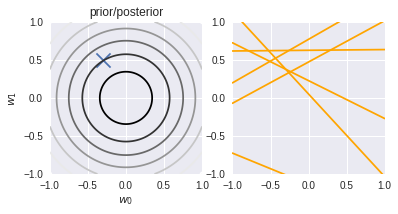

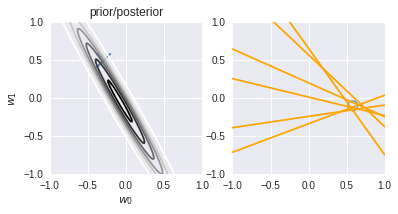

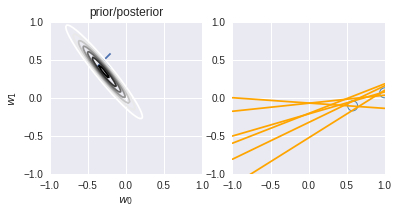

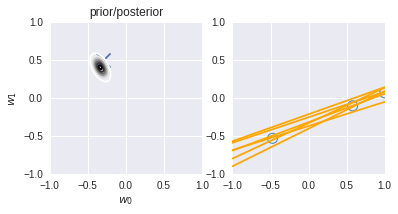

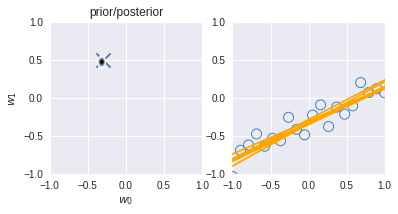

In [4]:
!pip install git+https://github.com/ctgk/PRML

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    LinearRegressor,
    RidgeRegressor,
    BayesianRegressor
)

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t
def linear(x):
    return -0.3 + 0.5 * x


x_train, y_train = create_toy_data(linear, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X = feature.transform(x)
model = BayesianRegressor(alpha=1., beta=100.)

for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    model.fit(X_train[begin: end], y_train[begin: end])
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=model.w_mean, cov=model.w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, model.predict(X, sample_size=6), c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()